In [354]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1 import Divider, Size
import numpy as np
from scipy.special import softmax
%matplotlib notebook

In [290]:
max_target_r = 12.5
min_target_r = 2.5
target_r_diff = max_target_r - min_target_r

max_count_r = 12.5
min_count_r = 2.5
count_r_diff = max_count_r - min_count_r

left_count = 10
right_count = 2
total_count = left_count+right_count
left_target = 5
right_target = 10
total_target = left_target+right_target

lc = left_count * count_r_diff + min_count_r
rc = right_count * count_r_diff + min_count_r
lt = left_target * target_r_diff + min_target_r
rt = right_target * target_r_diff + min_target_r

total = total_count+total_target

count = total_count/total
target = total_target/total
left = (left_count+left_target)/total
right = (right_count+right_target)/total

# lcs = (left_count / total_count)
# rcs = (right_count / total_count)
# lts = (left_target / total_target)
# rts = (right_target / total_target)
# lct = (left_count/left_target)
# rct = (right_count/right_target)

# lcs = left_count/total
# rcs = right_count/total
# lts = left_target/total
# rts = right_target/total

lcs = lc/total
rcs = rc/total
lts = lt/total
rts = rt/total


left_count_size = lcs #* count * left * 50 # * count_r_diff + min_count_r
right_count_size = rcs #* count * right * 50# * count_r_diff + min_count_r

left_target_size = lts #* target * left * 50# * target_r_diff + min_target_r
right_target_size = rts #* target * right * 50# * target_r_diff + min_target_r
                
print(lcs, rcs)
print(lts, rts)

print(count, target)
print(left, right)
print(left_count_size, right_count_size)
print(left_target_size, right_target_size)

3.7962962962962963 0.8333333333333334
1.9444444444444444 3.7962962962962963
0.4444444444444444 0.5555555555555556
0.5555555555555556 0.4444444444444444
3.7962962962962963 0.8333333333333334
1.9444444444444444 3.7962962962962963


<IPython.core.display.Javascript object>


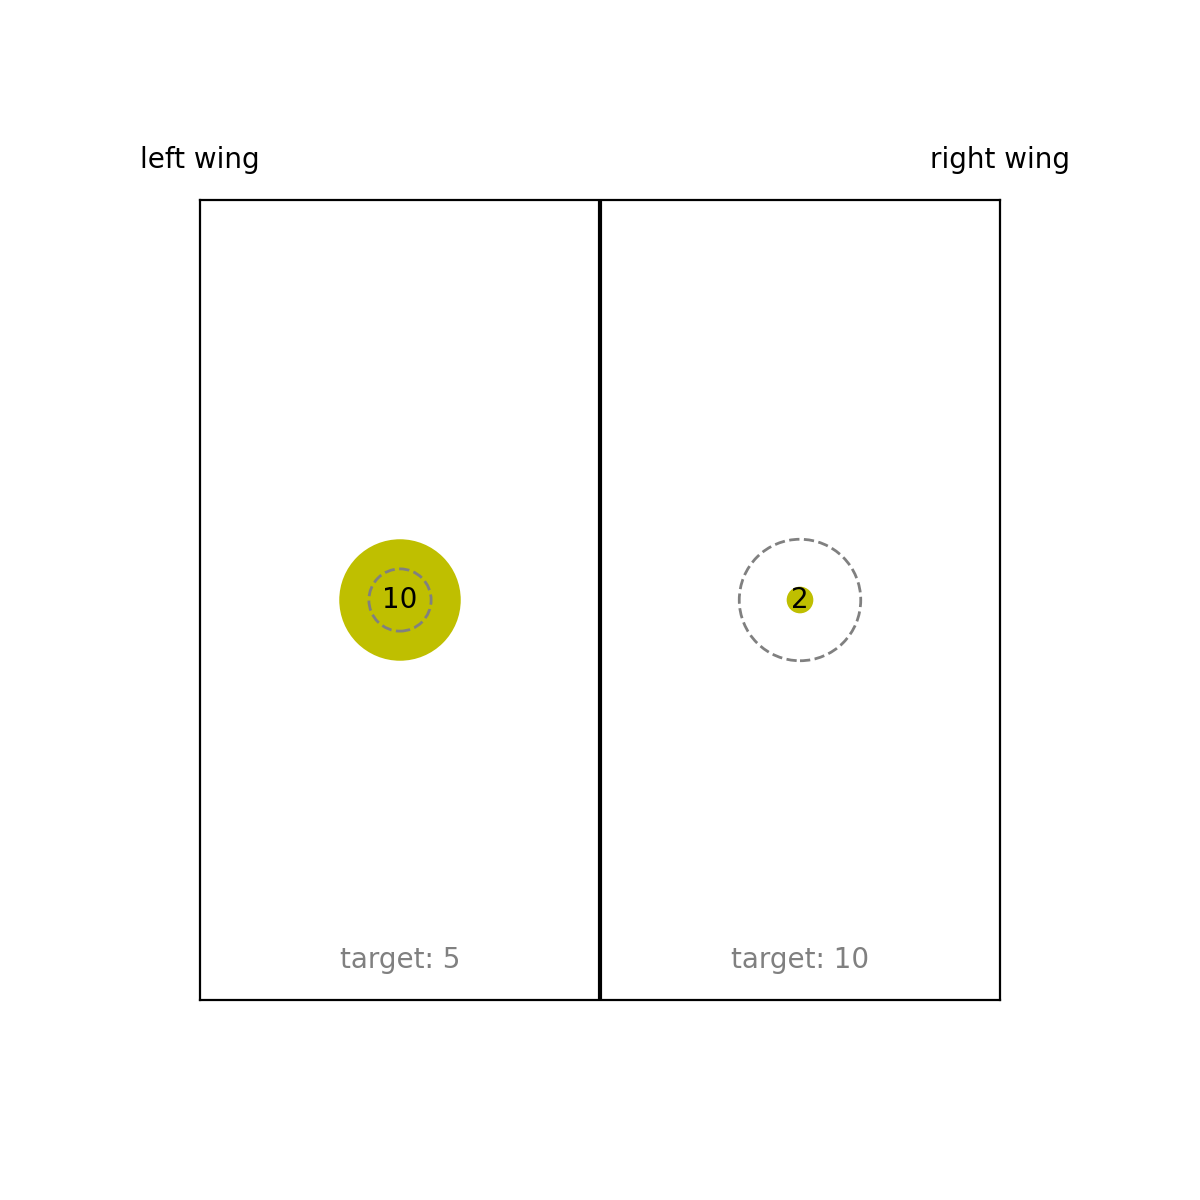

In [291]:
fig = plt.figure(figsize=(6,6))

h = [Size.Fixed(1.0), Size.Fixed(4)]
v = [Size.Fixed(1.0), Size.Fixed(4)]
divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)

ax = fig.add_axes(divider.get_position(),
                  axes_locator=divider.new_locator(nx=1, ny=1))

ax.set_xlim([0, 50])
ax.set_ylim([0, 50])

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

lw_text = ax.text(0, 1.05,'left wing', ha="center",va="center", color='black', fontsize="medium", transform=ax.transAxes)
rw_text = ax.text(1, 1.05,'right wing', ha="center",va="center", color='black', fontsize="medium", transform=ax.transAxes)
        
l_count = ax.text(0.25, 0.5,f'{left_count}', ha="center",va="center", color='black', fontsize="medium", transform=ax.transAxes,zorder=2000)
r_count = ax.text(0.75, 0.5,f'{right_count}', ha="center",va="center", color='black', fontsize="medium", transform=ax.transAxes,zorder=2000)

l_target = ax.text(0.25, 0.05,f'target: {left_target}', ha="center",va="center", color='grey', fontsize="medium", transform=ax.transAxes)
r_target = ax.text(0.75, 0.05,f'target: {right_target}', ha="center",va="center", color='grey', fontsize="medium", transform=ax.transAxes)



left_circle = patches.Circle(xy=(12.5,25), radius=left_count_size, fc='y', lw=None, zorder=100)
right_circle = patches.Circle(xy=(37.5,25), radius=right_count_size, fc='y', lw=None, zorder=100)

left_goal = patches.Circle(xy=(12.5,25), radius=left_target_size, fill=False, ec='grey',zorder=100,ls='--')
right_goal = patches.Circle(xy=(37.5,25), radius=right_target_size, fill=False, ec='grey',zorder=100,ls='--')


ax.add_patch(left_circle)
ax.add_patch(left_goal)
ax.add_patch(right_circle)
ax.add_patch(right_goal)

centre_line = ax.axvline(25, 0, 1, c='k')


In [315]:
def trianglify(x,y,s):
    return [[x-0.5*s,y-0.5*s], [x+0.5*s,y-0.5*s], [x, y+0.5*s]]

<IPython.core.display.Javascript object>


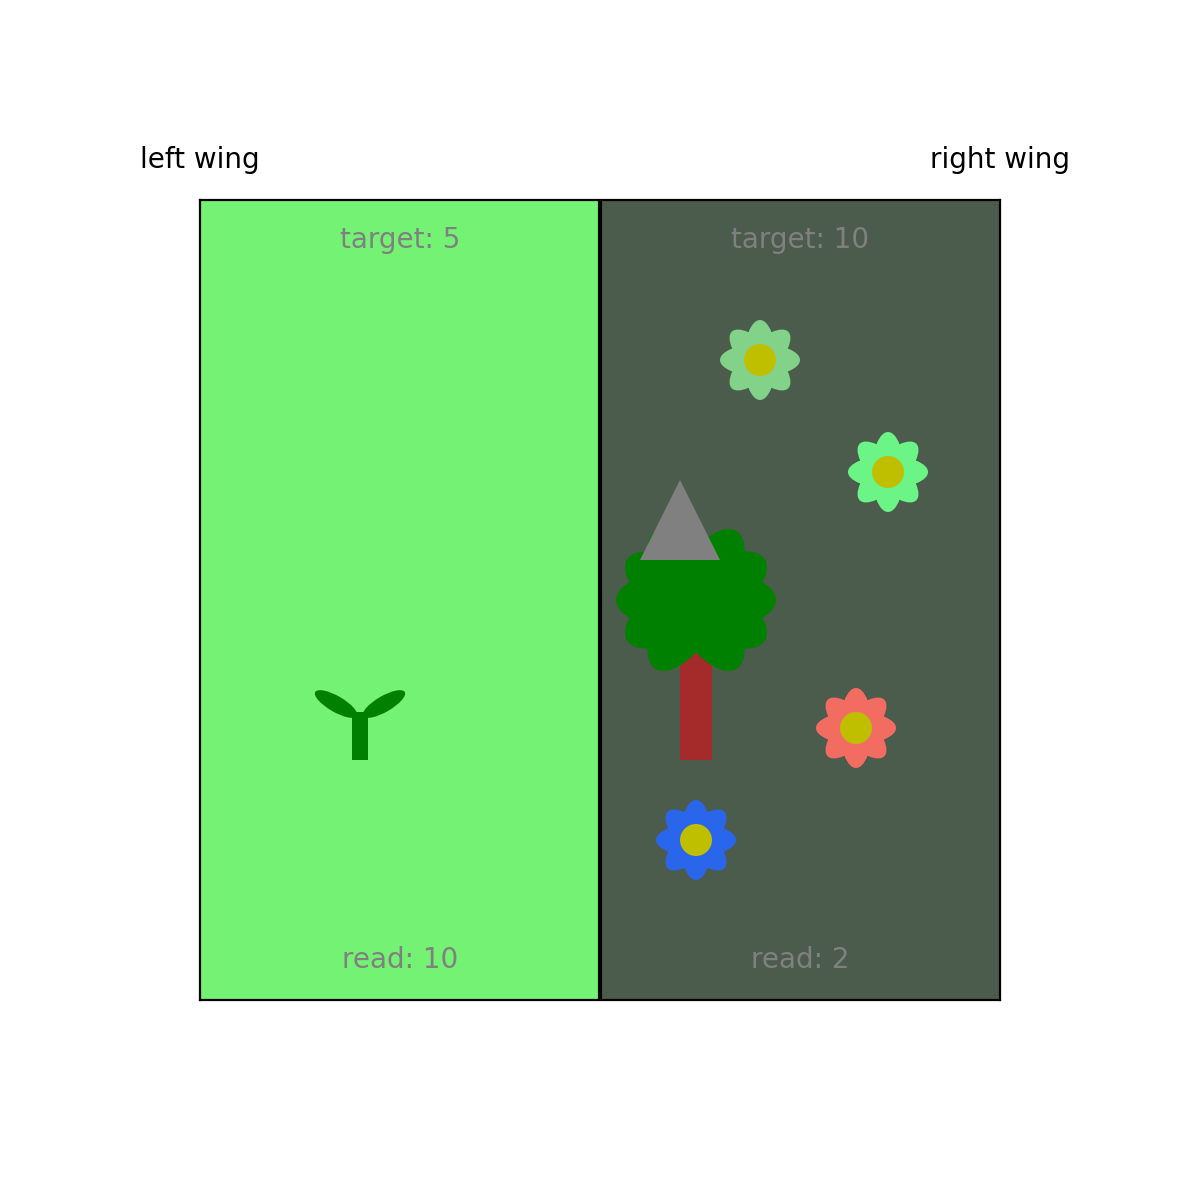

In [410]:
fig = plt.figure(figsize=(6,6))

h = [Size.Fixed(1.0), Size.Fixed(4)]
v = [Size.Fixed(1.0), Size.Fixed(4)]
divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)

ax = fig.add_axes(divider.get_position(),
                  axes_locator=divider.new_locator(nx=1, ny=1))

ax.set_xlim([0, 50])
ax.set_ylim([0, 50])

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

lw_text = ax.text(0, 1.05,'left wing', ha="center",va="center", color='black', fontsize="medium", transform=ax.transAxes)
rw_text = ax.text(1, 1.05,'right wing', ha="center",va="center", color='black', fontsize="medium", transform=ax.transAxes)
        
l_count = ax.text(0.25, 0.05,f'read: {left_count}', ha="center",va="center", color='grey', fontsize="medium", transform=ax.transAxes,zorder=2000)
r_count = ax.text(0.75, 0.05,f'read: {right_count}', ha="center",va="center", color='grey', fontsize="medium", transform=ax.transAxes,zorder=2000)

l_target = ax.text(0.25, 0.95,f'target: {left_target}', ha="center",va="center", color='grey', fontsize="medium", transform=ax.transAxes)
r_target = ax.text(0.75, 0.95,f'target: {right_target}', ha="center",va="center", color='grey', fontsize="medium", transform=ax.transAxes)

def make_flower(x,y,c):
    e11 = patches.Ellipse(xy=(x,y), width=5, height=2, fc=c, lw=None, zorder=10)
    e12 = patches.Ellipse(xy=(x,y), width=5, height=2, angle=45, fc=c, lw=None, zorder=10)
    e13 = patches.Ellipse(xy=(x,y), width=5, height=2, angle=90, fc=c, lw=None, zorder=10)
    e14 = patches.Ellipse(xy=(x,y), width=5, height=2, angle=135, fc=c, lw=None, zorder=10)
    c1 = patches.Circle(xy=(x,y), radius=1, fc='y', lw=None, zorder=10)
    return [e11,e12,e13,e14,c1]

def add_flowers(locs,offset,ax,n):
    if locs==None:
        for l in range(n):
            #c = np.random.choice(['b','y','r','w','purple'])
            c = (np.random.rand(),np.random.rand(),np.random.rand())
            x = np.random.rand()*25
            y = np.random.rand()*50
            flower = make_flower(x+offset,y,c)
            for x in flower: 
                ax.add_patch(x)
    else:
        for l in locs:
            #c = np.random.choice(['b','y','r','w','purple'])
            c = (np.random.rand(),np.random.rand(),np.random.rand())
            flower = make_flower(l[0]+offset,l[1],c)
            for x in flower: 

                ax.add_patch(x)
locations = [[6,10],[16,17],[8,25],[18,33],[10,40]]
add_flowers(locations,25,ax,10)
    
    
def make_saproling(x,y):
    s1 = patches.Rectangle(xy=(x-.5,y), width=1, height=3, fc='g', lw=None, zorder=9)
    s2 = patches.Ellipse(xy=(x-1.5,y+3.5), width=3, height=1, angle=150, fc='g', lw=None, zorder=9)
    s3 = patches.Ellipse(xy=(x+1.5,y+3.5), width=3, height=1, angle=30, fc='g', lw=None, zorder=9)
    return [s1,s2,s3]

saproling = make_saproling(10,15)

for x in saproling: 
    ax.add_patch(x)
    
def make_tree(x,y):
    t0 = patches.Rectangle(xy=(x,y), width=2, height=8, fc='brown', lw=None, zorder=10)
    t1 = patches.Ellipse(xy=(x+1,y+10), width=10, height=4, fc='g', lw=None, zorder=10)
    t2 = patches.Ellipse(xy=(x+1,y+10), width=10, height=4, angle=30, fc='g', lw=None, zorder=10)
    t3 = patches.Ellipse(xy=(x+1,y+10), width=10, height=4, angle=-30, fc='g', lw=None, zorder=10)
    t4 = patches.Ellipse(xy=(x+1,y+10), width=10, height=4, angle=60, fc='g', lw=None, zorder=10)
    t5 = patches.Ellipse(xy=(x+1,y+10), width=10, height=4, angle=-60, fc='g', lw=None, zorder=10)
        
    return [t0,t1,t2,t3,t4,t5]

tree = make_tree(30,15)

for x in tree: 
    ax.add_patch(x)

def make_rock(x,y):
    r1 = patches.Polygon(trianglify(x,y,5), fc='grey', lw=None, zorder=100)
    return [r1]
rock = make_rock(30,30)

for x in rock: 
    ax.add_patch(x)





colours = {'dead': '#4c5c4c', 'dormant': '#b9edb9', 'healthy': '#74f274','thriving':'#50ba50'}


def make_background(c1,c2):
    colours = {'dead': '#4c5c4c', 'dormant': '#b9edb9', 'healthy': '#74f274','thriving':'#50ba50'}
    b1 = patches.Rectangle(xy=(0,0), width=25, height=50, fc=colours[c1], lw=None, zorder=0)
    b2 = patches.Rectangle(xy=(25,0), width=25, height=50, fc=colours[c2], lw=None, zorder=0)
    return [b1,b2]

background = make_background('healthy','dead')

for x in background: 
    ax.add_patch(x)




centre_line = ax.axvline(25, 0, 1, c='k')
